# **Car Price Prediction Project**

## **Project Introduction**
The Car Price Prediction project is a **supervised machine learning task** aimed at predicting the selling price of cars based on multiple features such as year of manufacture, mileage, fuel type, engine size, transmission, and ownership history.  

This project helps to:  
- Understand the key factors affecting car prices.  
- Build a predictive model to estimate car prices accurately.  
- Apply regression techniques to real-world datasets for practical insights.  

The dataset typically includes attributes like `Car_Name`, `Year`, `Kms_Driven`, `Fuel_Type`, `Transmission`, and `Seller_Type`. By analyzing and modeling this data, we can provide price estimates for cars in the market and assist buyers and sellers in decision-making.


In [1]:
import numpy as np
import pandas as pd 

#importing the csv file
df = pd.read_csv("cardata.csv")
df.head()



,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [2]:
#Get summary info 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [3]:
#check dataset shape 

df.shape

(301, 9)

In [4]:
#summary statistics of numerical column 
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [5]:
#check for missing values 

df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

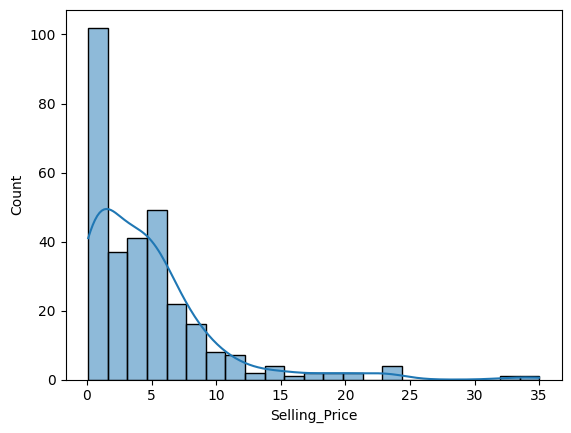

In [6]:
## **Exploratory Data Analyssis (EDA)**

import matplotlib.pyplot as plt 
import seaborn as sns 


#distribution of the target variable target price 
sns.histplot(df["Selling_Price"],kde= True) 
plt.show()

In [13]:



#one hot encoding 
df = pd.get_dummies(df, drop_first=True)


print(df.dtypes)



Year                        int64
Selling_Price             float64
Present_Price             float64
Kms_Driven                  int64
Owner                       int64
Fuel_Type_Diesel             bool
Fuel_Type_Petrol             bool
Seller_Type_Individual       bool
Transmission_Manual          bool
dtype: object


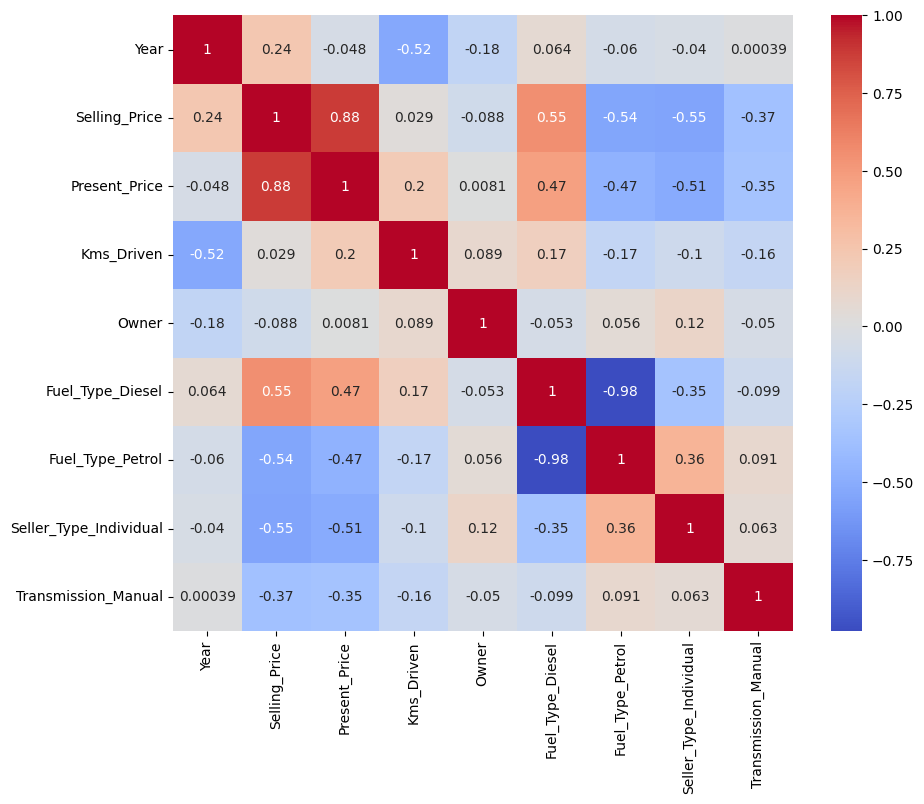

In [14]:
# Correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [15]:
#define feature and targets 

X = df.drop('Selling_Price', axis =1)
y = df['Selling_Price']

In [16]:
X.shape

(301, 8)

In [17]:
y.shape

(301,)

In [18]:
X.head()

,Year,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,2014,5.59,27000,0,False,True,False,True
1,2013,9.54,43000,0,True,False,False,True
2,2017,9.85,6900,0,False,True,False,True
3,2011,4.15,5200,0,False,True,False,True
4,2014,6.87,42450,0,True,False,False,True


In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# Train test split: 80% train and 20% test 




In [23]:
# Training machine learning model 
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [26]:
# Make predictions 
y_pred = model.predict(X_test)

In [29]:
#Evaluate the model 

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test,y_pred)))
print("R2 Score:", r2_score(y_test, y_pred))

MAE: 1.2162256821298534
MSE: 3.478803970641277
RMSE: 1.865155213552287
R2 Score: 0.8489813024897601


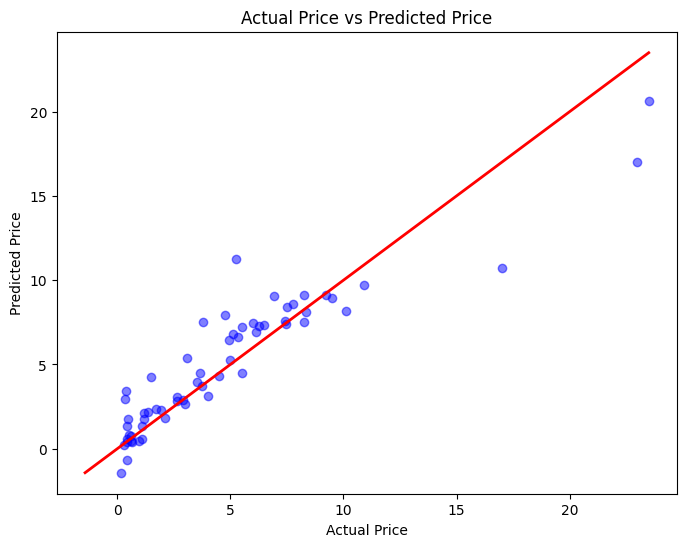

In [35]:
plt.figure(figsize=(8,6))

# Scatter points: actual vs predicted
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)

# Middle diagonal line 
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())

plt.plot([min_val, max_val], [min_val, max_val], color='red', linewidth=2)

plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")

plt.show()
